<a href="https://colab.research.google.com/github/AnastasiyaKrokhina/DataCon-time-1/blob/main/notebooks/SGDRegressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#satisfying requirements
from pip._internal import main 
packages = ('traitlets', 
            'IPython', 
            'ipywidgets',
            'catboost', 
            'category-encoders',
            'pandas', 
            'numpy', 
            'seaborn', 
            'sklearn',
            'matplotlib',
            'pymatgen',
            'pprint')
for package in packages:
    try:
        __import__(package)
    except ImportError:
        main(['install', package.split()[0]])
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from google.colab import drive
from sklearn.model_selection import cross_val_score
import os
from sklearn.model_selection import GridSearchCV 
from sklearn.linear_model import SGDRegressor

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for pymatgen: filename=pymatgen-2022.0.17-cp37-cp37m-linux_x86_64.whl size=41841027 sha256=80ba37c8f223bb6c76e8852ca88a8df4721e0aa33a796508c9739a95698921ff
  Stored in directory: /root/.cache/pip/wheels/cf/f6/22/58a9be23c5f1b452770e02ff42047175eaf0f9c2f15219fc76
Successfully built pymatgen


In [ ]:
url = 'https://github.com/AnastasiyaKrokhina/DataCon-time-1/blob/main/data/final.csv?raw=true'
df = pd.read_csv(url, delimiter = ',', index_col=0)

In [ ]:
X = df.drop('Viability (%)', axis=1, inplace=False)
y = df['Viability (%)']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=4)

In [ ]:

model = SGDRegressor()
param_grid = {
    'alpha': 10.0 ** -np.arange(1, 6),
    'loss': ['squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
}
clf = GridSearchCV(model, param_grid, cv = 10)   #10-fold cross-val
clf.fit(X_train, y_train) 

print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",clf.best_estimator_)
print("\n The best score across ALL searched params:\n",clf.best_score_)
print("\n The best parameters across ALL searched params:\n",clf.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureW

 Results from Grid Search 

 The best estimator across ALL searched params:
 SGDRegressor(learning_rate='adaptive', loss='squared_loss')

 The best score across ALL searched params:
 0.11834264369498562

 The best parameters across ALL searched params:
 {'alpha': 0.0001, 'learning_rate': 'adaptive', 'loss': 'squared_loss', 'penalty': 'l2'}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'prediction for SGDRegressor')

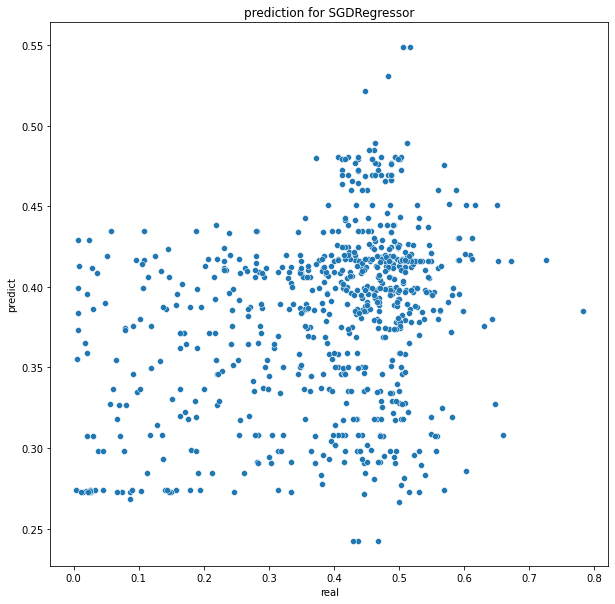

In [ ]:
RFR_plot = plt.figure(figsize = (10,10)) 
sns.scatterplot(y_test, clf.predict(X_test))
plt.xlabel('real')
plt.ylabel('predict')
plt.title('prediction for SGDRegressor')